In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [94]:
df=pd.read_csv("Housing.csv")
df.drop(columns=["stories","hotwaterheating"],axis=1,inplace=True)

In [95]:
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,2,no,unfurnished
541,1767150,2400,3,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,yes,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,no,no,no,no,0,no,furnished


In [96]:
df.sample(10)
df.replace({"yes":1,"no":0},inplace=True)

C:\Users\Rahul Sharma\AppData\Local\Temp\ipykernel_8784\3757138077.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"yes":1,"no":0},inplace=True)


In [97]:
from sklearn.preprocessing import StandardScaler

In [99]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:11],df.iloc[:,0],test_size=0.2)

In [100]:
ord=OrdinalEncoder(categories=[["unfurnished","semi-furnished","furnished"]])
x_train["furnishingstatus"]=ord.fit_transform(x_train[["furnishingstatus"]])
x_test["furnishingstatus"]=ord.transform(x_test[["furnishingstatus"]])

In [101]:

si=StandardScaler()
x_train=si.fit_transform(x_train)
x_test=si.transform(x_test)

In [102]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
y_pred=lr.predict(x_test)

In [104]:
from sklearn.metrics import r2_score,mean_absolute_error

In [105]:
r2_score(y_test,y_pred)

0.635130929146865

In [67]:
lr.predict([x_test[3]])

array([4526335.17224619])

In [62]:
y_test

147     5600000
280     4270000
3      12215000
233     4620000
389     3500000
         ...   
493     2800000
221     4767000
534     2100000
401     3500000
171     5250000
Name: price, Length: 109, dtype: int64

In [63]:
x_test[1]

array([ 0.53130167, -1.2618433 , -0.57541465,  0.23820196,  0.39946773,
       -0.49569576, -0.74269874, -0.22494979, -0.68050514, -0.83884951,
       -0.56675579, -1.27335626])

In [375]:
oe.fit(x_train.iloc[:,11:12])

OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])

In [376]:
arr=oe.transform(x_train.iloc[:,11:12])
arr1=oe.transform(x_test.iloc[:,11:12])
x_train["furnishingstatus"]=arr
x_test["furnishingstatus"]=arr1

In [377]:
x_train["furnishingstatus"]

169    1.0
86     0.0
417    2.0
342    2.0
347    0.0
      ... 
363    1.0
27     1.0
225    1.0
253    2.0
332    1.0
Name: furnishingstatus, Length: 436, dtype: float64

In [378]:
# x_test.drop(["mainroad","guestroom","hotwaterheating"],axis=1,inplace=True)
# x_train.drop(["mainroad","guestroom","hotwaterheating"],axis=1,inplace=True)

In [379]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [380]:
x_test


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
186,11410,2,1,2,1,0,0,0,0,0,1,2.0
521,3635,2,1,1,0,0,0,0,0,0,0,0.0
145,5000,3,1,4,1,0,0,0,0,0,0,2.0
152,5400,5,1,2,1,1,1,0,1,0,1,2.0
381,4000,2,1,1,1,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31,7000,3,1,4,1,0,0,0,1,2,0,1.0
193,4800,2,1,1,1,1,1,0,0,0,0,1.0
129,11460,3,1,3,1,0,0,0,0,2,1,1.0
38,6000,3,1,4,1,1,0,0,1,2,0,0.0


In [381]:
y_pred=model.predict(x_test)

In [382]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error
y_pred=y_pred.astype("int")
y_test=np.array(y_test).astype("int")

In [383]:
# accuracy_score(y_test,y_pred)
r2_score(y_test,y_pred)

1.0000168607826796

In [384]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error
mean_absolute_error(y_test,y_pred)

767774.9816513761

In [385]:
from sklearn.linear_model import Lasso

In [386]:
ls=Lasso(alpha=10000)

In [387]:
ls.fit(x_train,y_train)

Lasso(alpha=10000)

In [388]:
ls.coef_

array([2.66742691e+02, 1.09537240e+05, 9.38650180e+05, 4.09441638e+05,
       2.55869432e+05, 2.97641116e+05, 3.18464430e+05, 5.26208816e+05,
       8.11079604e+05, 2.57210255e+05, 5.69474489e+05, 2.31303687e+05])

In [389]:
y_pred1=ls.predict(x_test)

In [391]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
186,11410,2,1,2,1,0,0,0,0,0,1,2.0
521,3635,2,1,1,0,0,0,0,0,0,0,0.0
145,5000,3,1,4,1,0,0,0,0,0,0,2.0
152,5400,5,1,2,1,1,1,0,1,0,1,2.0
381,4000,2,1,1,1,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31,7000,3,1,4,1,0,0,0,1,2,0,1.0
193,4800,2,1,1,1,1,1,0,0,0,0,1.0
129,11460,3,1,3,1,0,0,0,0,2,1,1.0
38,6000,3,1,4,1,1,0,0,1,2,0,0.0


In [392]:
y_pred=model.predict(x_test)

AttributeError: module 'matplotlib' has no attribute 'scatter'

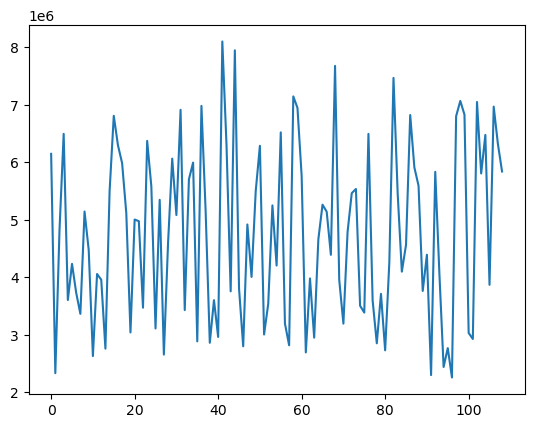

In [396]:
plt.plot(y_pred)

In [ ]:
import seaborn as sns

C:\Users\Rahul Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rahul Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

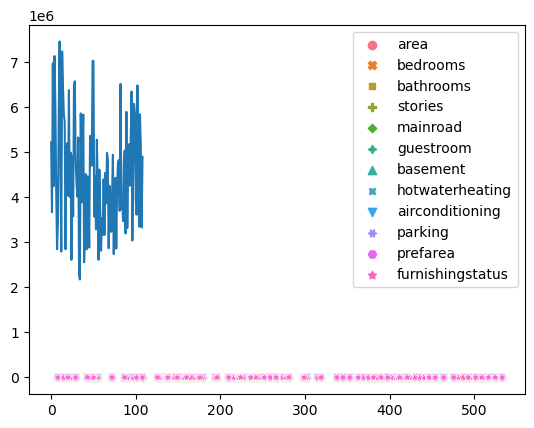

In [342]:
sns.scatterplot(x_test)
sns.lineplot(y_pred1)

In [343]:
model2=LinearRegression()

In [344]:
model2.fit(np.array(x_train["area"]).reshape(-1,1),y_train)

LinearRegression()

In [345]:
y_pred2=model2.predict(np.array(x_test["area"]).reshape(-1,1))

In [346]:
mean_absolute_error(y_test,y_pred2)

1196201.260472617